In [1]:
import os
import pywt
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, io
from skimage.transform import resize
from PIL import Image


def get_magnitude(response):
    magnitude = np.array([np.sqrt(response[0][i][j]**2+response[1][i][j]**2)
                         for i in range(len(response[0])) for j in range(len(response[0][i]))])
    return magnitude

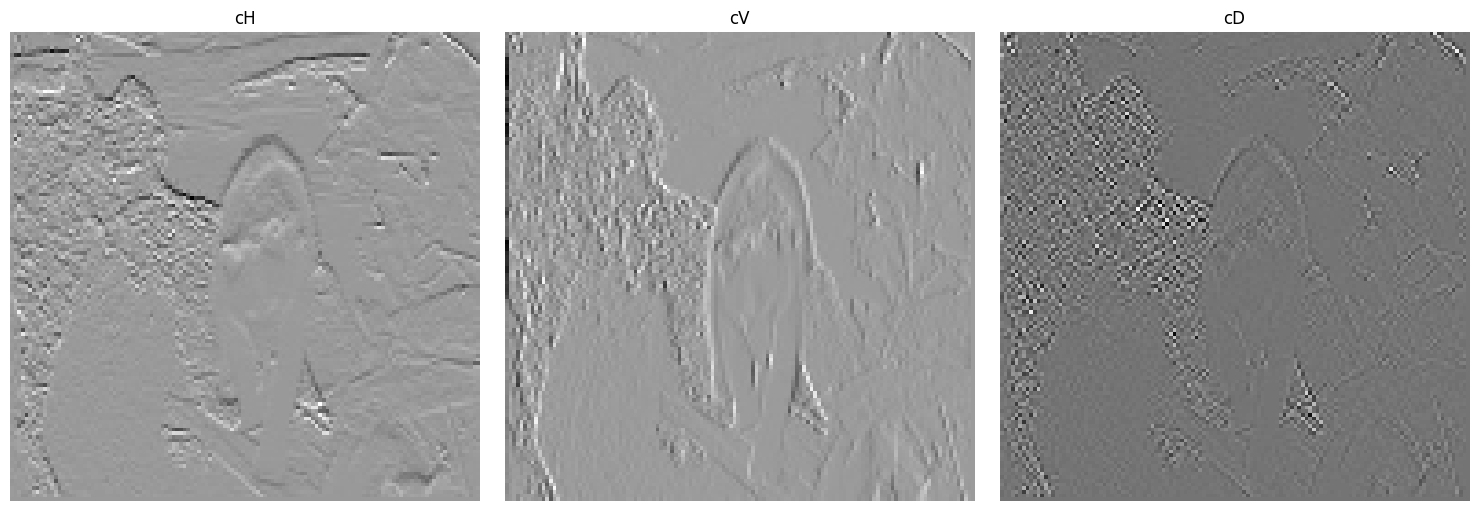

In [4]:
# current_dir = os.getcwd()

image_path = '/content/12(1).jpeg'
image_path2= '/content/12(2).jpeg'
# image_path = os.path.join(current_dir, '12(1).jpeg')
# image_path2 = os.path.join(current_dir, '12(2).jpeg')
# image_path = os.path.join(current_dir, "009 (1).jpeg")
# image_path2 = os.path.join(current_dir, '009 (2).jpeg')


# Load the image and convert it to grayscale
image1 = io.imread(image_path, as_gray=True)
image2 = io.imread(image_path2, as_gray=True)
image_resize1 = resize(image1, (255,255), mode='reflect', anti_aliasing=True)
image_resize2 = resize(image2, (255,255), mode='reflect', anti_aliasing=True)


# 2D Forward Discrete Wavelet Transform
coeffs = pywt.dwt2(image_resize1, 'bior1.1')
cA, (cH, cV, cD) = coeffs


zero_cA = np.zeros_like(cA)
reconstructed_image = pywt.idwt2((zero_cA, (cH, cV, cD)), 'bior1.1')


reconstructed_image_binary = np.where(reconstructed_image < 0, -reconstructed_image, 0)

image2_normalized = (image_resize2 - image_resize2.min()) / (image_resize2.max() - image_resize2.min())
reconstructed_image_binary_resized = resize(reconstructed_image_binary, image_resize2.shape, mode='reflect', anti_aliasing=True)

reconstructed_image_binary_resized = (reconstructed_image_binary_resized - reconstructed_image_binary_resized.min()) / (reconstructed_image_binary_resized.max() - reconstructed_image_binary_resized.min())


substraction_image = image2_normalized - reconstructed_image_binary_resized

# Correct any out-of-bound values after subtraction
substraction_image = np.clip(substraction_image, 0, 1)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cH, cmap='gray')
axes[0].set_title('cH')
axes[0].axis('off')

axes[1].imshow(cV, cmap='gray')
axes[1].set_title('cV')
axes[1].axis('off')

axes[2].imshow(cD, cmap='gray')
axes[2].set_title('cD')
axes[2].axis('off')

plt.tight_layout()
plt.show()

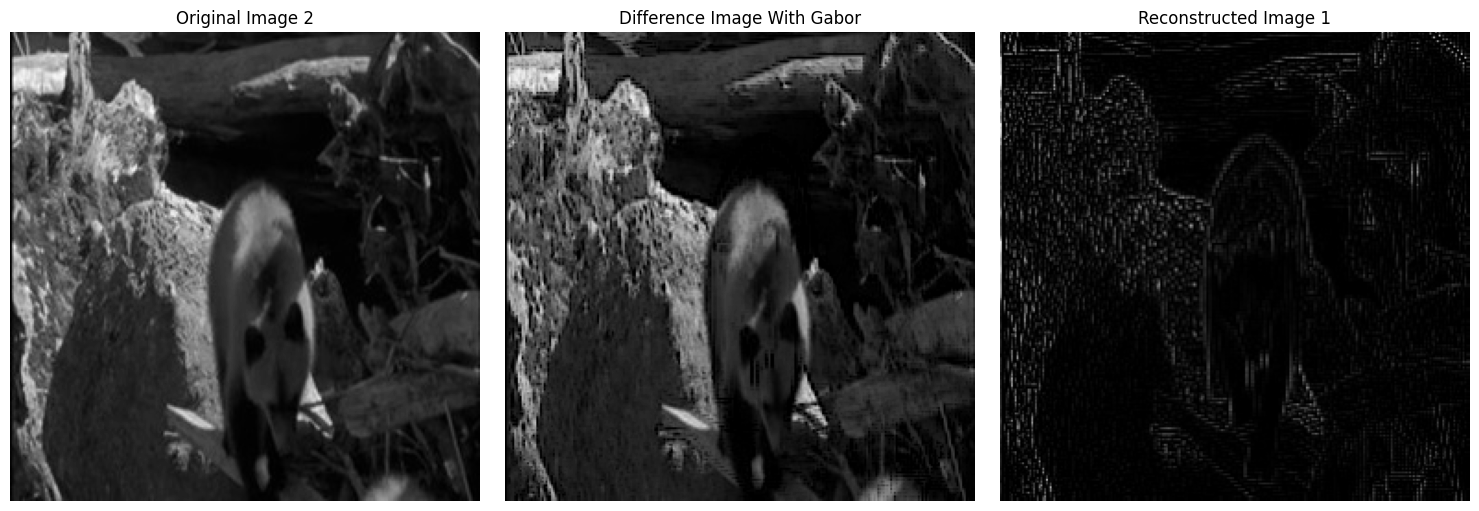

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image2_normalized, cmap='gray')
axes[0].set_title('Original Image 2')
axes[0].axis('off')

axes[1].imshow(substraction_image, cmap='gray')
axes[1].set_title('Difference Image With Gabor')
axes[1].axis('off')

axes[2].imshow(reconstructed_image_binary_resized, cmap='gray')
axes[2].set_title('Reconstructed Image 1')
axes[2].axis('off')

plt.tight_layout()
plt.show()